<a href="https://colab.research.google.com/github/Amol2332/eda-on-global-terrorism/blob/main/amol_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from matplotlib.ticker import ScalarFormatter
import warnings
warnings.filterwarnings('ignore')

In [1]:
#df1 = pd.read_csv('/content/drive/MyDrive/eda/Global Terrorism Data.csv')
#df.head()


#UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 7127: invalid continuation byte

In [2]:
df = pd.read_csv('/content/drive/MyDrive/eda/Global Terrorism Data.csv', encoding = "ISO-8859-1")
df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [18]:
null_value_list = [i for i in df.columns if df[i].isnull().sum() >= 150000]
null_value_list

['approxdate',
 'resolution',
 'alternative',
 'alternative_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'guncertain2',
 'guncertain3',
 'claimmode',
 'claimmode_txt',
 'claim2',
 'claimmode2',
 'claimmode2_txt',
 'claim3',
 'claimmode3',
 'claimmode3_txt',
 'compclaim',
 'weaptype2',
 'weaptype2_txt',
 'weapsubtype2',
 'weapsubtype2_txt',
 'weaptype3',
 'weaptype3_txt',
 'weapsubtype3',
 'weapsubtype3_txt',
 'weaptype4',
 'weaptype4_txt',
 'weapsubtype4',
 'weapsubtype4_txt',
 'nhostkid',
 'nhostkidus',
 'nhours',
 'ndays',
 'divert',
 'kidhijcountry',
 'ransomamt',
 'ransomamtus',
 'ransompaid',
 'ransompaidus',
 'ransomnote',
 'hostkidoutcome',
 'hostk

In [9]:
non_null_value_list = [i for i in df.columns if df[i].isnull().sum() == 0]
non_null_value_list

['eventid',
 'iyear',
 'imonth',
 'iday',
 'extended',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'vicinity',
 'crit1',
 'crit2',
 'crit3',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'targtype1',
 'targtype1_txt',
 'gname',
 'individual',
 'weaptype1',
 'weaptype1_txt',
 'property',
 'dbsource',
 'INT_LOG',
 'INT_IDEO',
 'INT_MISC',
 'INT_ANY']

In [13]:
df.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
attack_df = df[['attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt','attacktype3', 'attacktype3_txt']]
attack_df.head()

,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt
0,1,Assassination,NaN,NaN,NaN,NaN
1,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN
2,1,Assassination,NaN,NaN,NaN,NaN
3,3,Bombing/Explosion,NaN,NaN,NaN,NaN
4,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN


In [30]:
target1_df = df[['targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt','target1']]
target1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   targtype1         181691 non-null  int64  
 1   targtype1_txt     181691 non-null  object 
 2   targsubtype1      171318 non-null  float64
 3   targsubtype1_txt  171318 non-null  object 
 4   target1           181055 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.9+ MB


In [37]:
target1_df.targtype1_txt.value_counts()   

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [36]:
target2_df = df[['targtype2','targtype2_txt', 'targsubtype2', 'targsubtype2_txt','target2']]
target2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   targtype2         11144 non-null  float64
 1   targtype2_txt     11144 non-null  object 
 2   targsubtype2      10685 non-null  float64
 3   targsubtype2_txt  10685 non-null  object 
 4   target2           11020 non-null  object 
dtypes: float64(2), object(3)
memory usage: 6.9+ MB


In [38]:
target3_df = df[['targtype3', 'targtype3_txt','targsubtype3', 'targsubtype3_txt','target3']]
target3_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   targtype3         1176 non-null   float64
 1   targtype3_txt     1176 non-null   object 
 2   targsubtype3      1097 non-null   float64
 3   targsubtype3_txt  1097 non-null   object 
 4   target3           1175 non-null   object 
dtypes: float64(2), object(3)
memory usage: 6.9+ MB


In [25]:
wound_df = df[['nwound', 'nwoundus', 'nwoundte']]
len(wound_df.nwound.value_counts())

238

In [26]:
ransom_df = df[['ransom', 'ransomamt', 'ransomamtus','ransompaid', 'ransompaidus', 'ransomnote']]
ransom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ransom        77381 non-null  float64
 1   ransomamt     1350 non-null   float64
 2   ransomamtus   563 non-null    float64
 3   ransompaid    774 non-null    float64
 4   ransompaidus  552 non-null    float64
 5   ransomnote    514 non-null    object 
dtypes: float64(5), object(1)
memory usage: 8.3+ MB


In [42]:
ransom_df.ransom

0         0.0
1         1.0
2         0.0
3         0.0
4         0.0
         ... 
181686    NaN
181687    NaN
181688    NaN
181689    NaN
181690    NaN
Name: ransom, Length: 181691, dtype: float64

In [11]:
attack_df.attacktype1_txt.value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [7]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [8]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
len(non_null_value_list)

29

1)	Year
2)	Month
3)	Day
4)	Country
5)	Region
6)	State
7)	City
8)	Latitude & longitude (if possible, we will geo map)
9)	Attack type
10)	Killed
11)	Wounded
12)	Target
13)	Summary of the incident in brief 
14)	Group
15)	Target-type
16)	Weapon type
17)	Motive

In [ ]:
df2 = df[df['iyear','imonth', 'iday','country_txt','region_txt','provstate','city','latitude','longitude','nkill','nwound','targtype1_txt','motive','weaptype1_txt']]

In [44]:
df2 = df[['iyear','imonth', 'iday','country_txt','region_txt','provstate','city','latitude','longitude','nkill','nwound','targtype1_txt','motive','weaptype1_txt']]
df2.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,latitude,longitude,nkill,nwound,targtype1_txt,motive,weaptype1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,Private Citizens & Property,NaN,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,0.0,Government (Diplomatic),NaN,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,0.0,Journalists & Media,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Government (Diplomatic),NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Government (Diplomatic),NaN,Incendiary


In [45]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   iyear          181691 non-null  int64  
 1   imonth         181691 non-null  int64  
 2   iday           181691 non-null  int64  
 3   country_txt    181691 non-null  object 
 4   region_txt     181691 non-null  object 
 5   provstate      181270 non-null  object 
 6   city           181257 non-null  object 
 7   latitude       177135 non-null  float64
 8   longitude      177134 non-null  float64
 9   nkill          171378 non-null  float64
 10  nwound         165380 non-null  float64
 11  targtype1_txt  181691 non-null  object 
 12  motive         50561 non-null   object 
 13  weaptype1_txt  181691 non-null  object 
dtypes: float64(4), int64(3), object(7)
memory usage: 19.4+ MB


In [49]:
df2.rename(columns = {'iyear':'year','imonth':'month', 'iday':'day','country_txt':'country','region_txt':'region','provstate':'state','nkill':'kill','nwound':'wounded','targtype1_txt':'target','weaptype1_txt':'weapon'}, inplace =True)
df2.head()

,year,month,day,country,region,state,city,latitude,longitude,kill,wounded,target,motive,weapon
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0.0,Private Citizens & Property,NaN,Unknown
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,0.0,Government (Diplomatic),NaN,Unknown
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,0.0,Journalists & Media,NaN,Unknown
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,NaN,Government (Diplomatic),NaN,Explosives
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,NaN,Government (Diplomatic),NaN,Incendiary


In [50]:
df2.corr()

,year,month,day,latitude,longitude,kill,wounded
year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223
kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375
wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000


In [51]:
df2.columns

Index(['year', 'month', 'day', 'country', 'region', 'state', 'city',
       'latitude', 'longitude', 'kill', 'wounded', 'target', 'motive',
       'weapon'],
      dtype='object')

In [57]:
df2.weapon.value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [60]:
df2.weapon.value_counts().sum()

181691

In [70]:
a = pd.get_dummies(df2['weapon'], dtype = int)
a.head()

,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0


In [71]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 12 columns):
 #   Column                                                                       Non-Null Count   Dtype
---  ------                                                                       --------------   -----
 0   Biological                                                                   181691 non-null  int64
 1   Chemical                                                                     181691 non-null  int64
 2   Explosives                                                                   181691 non-null  int64
 3   Fake Weapons                                                                 181691 non-null  int64
 4   Firearms                                                                     181691 non-null  int64
 5   Incendiary                                                                   181691 non-null  int64
 6   Melee                                       

In [74]:
len(df2)

181691

In [76]:
df3 = pd.concat([df2,a], axis = 1)
df3.head()

,year,month,day,country,region,state,city,latitude,longitude,kill,...,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,...,0,0,0,0,0,0,0,0,1,0
1,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,0.0,...,0,0,0,0,0,0,0,0,1,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,1.0,...,0,0,0,0,0,0,0,0,1,0
3,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,NaN,...,1,0,0,0,0,0,0,0,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,NaN,...,0,0,0,1,0,0,0,0,0,0


In [77]:
df3.corr()

,year,month,day,latitude,longitude,kill,wounded,Biological,Chemical,Explosives,Fake Weapons,Firearms,Incendiary,Melee,Other,Radiological,Sabotage Equipment,Unknown,"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)"
year,1.000000,0.000139,0.018254,0.166933,0.003917,0.015341,0.015273,-0.003660,0.000631,0.114686,-0.005609,-0.078888,-0.074022,0.013731,0.003782,-0.004348,0.003352,-0.018191,0.012265
month,0.000139,1.000000,0.005497,-0.015978,-0.003880,0.003463,0.002938,0.008620,-0.004796,-0.001275,-0.005475,-0.002965,-0.005351,0.010252,0.001345,-0.001211,-0.003143,0.006841,0.007154
day,0.018254,0.005497,1.000000,0.003423,-0.002285,-0.003693,-0.001268,-0.001201,-0.008123,0.010260,-0.001793,-0.003882,-0.009548,0.002664,0.002976,-0.004630,-0.007698,-0.003004,-0.000223
latitude,0.166933,-0.015978,0.003423,1.000000,0.001463,-0.018124,0.015988,0.007220,0.008773,0.095672,0.004575,-0.100091,0.039963,0.014988,0.005625,0.006604,-0.001427,-0.051100,0.013255
longitude,0.003917,-0.003880,-0.002285,0.001463,1.000000,-0.000562,0.000223,0.000027,0.000098,0.002458,0.000031,-0.003478,0.000598,0.000347,0.000059,0.000024,0.000064,0.000698,0.000065
kill,0.015341,0.003463,-0.003693,-0.018124,-0.000562,1.000000,0.534375,-0.002609,-0.001544,-0.038625,-0.002852,0.045554,-0.041696,0.006910,-0.002891,-0.001770,-0.004484,0.022590,0.051279
wounded,0.015273,0.002938,-0.001268,0.015988,0.000223,0.534375,1.000000,0.008509,0.050697,0.037649,-0.001245,-0.031813,-0.018888,-0.006310,-0.001575,-0.000738,-0.000865,-0.013604,0.099089
Biological,-0.003660,0.008620,-0.001201,0.007220,0.000027,-0.002609,0.008509,1.000000,-0.000584,-0.014124,-0.000187,-0.009568,-0.003547,-0.001989,-0.000348,-0.000122,-0.000387,-0.004188,-0.000380
Chemical,0.000631,-0.004796,-0.008123,0.008773,0.000098,-0.001544,0.050697,-0.000584,1.000000,-0.042808,-0.000567,-0.028999,-0.010749,-0.006028,-0.001054,-0.000369,-0.001172,-0.012692,-0.001151
Explosives,0.114686,-0.001275,0.010260,0.095672,0.002458,-0.038625,0.037649,-0.014124,-0.042808,1.000000,-0.013715,-0.701417,-0.259997,-0.145796,-0.025496,-0.008932,-0.028357,-0.306981,-0.027850


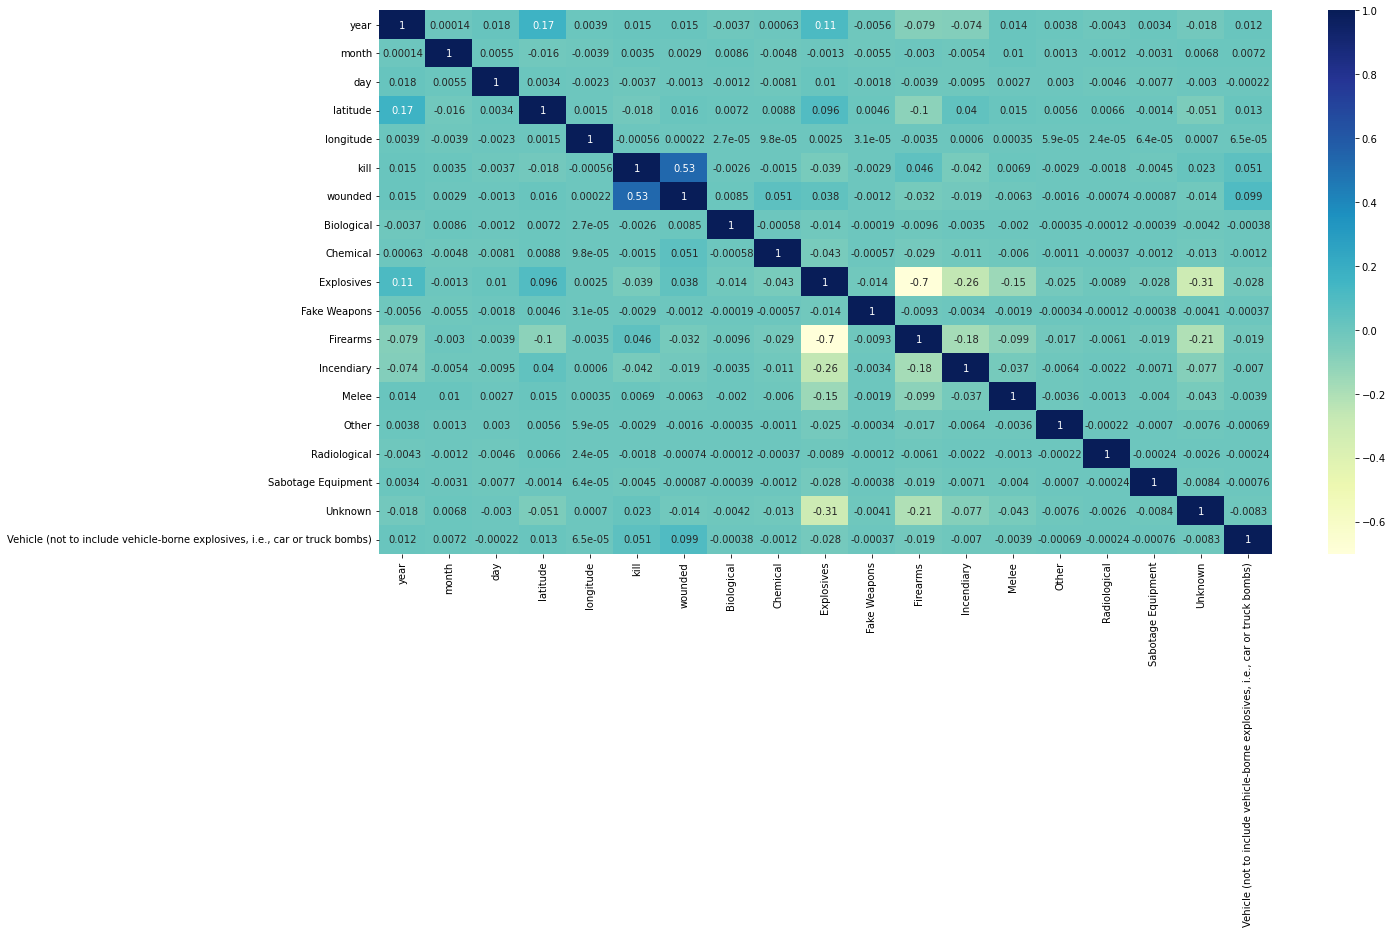

In [86]:

plt.figure(figsize=(20,10))
dataplot = sb.heatmap(df3.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
fig = px.choropleth(df, locations="country",
color="guest",
hover_name="arrival_date_year",
animation_frame="market_segment",
title = "Fare of hotels in Different Country